Question-1

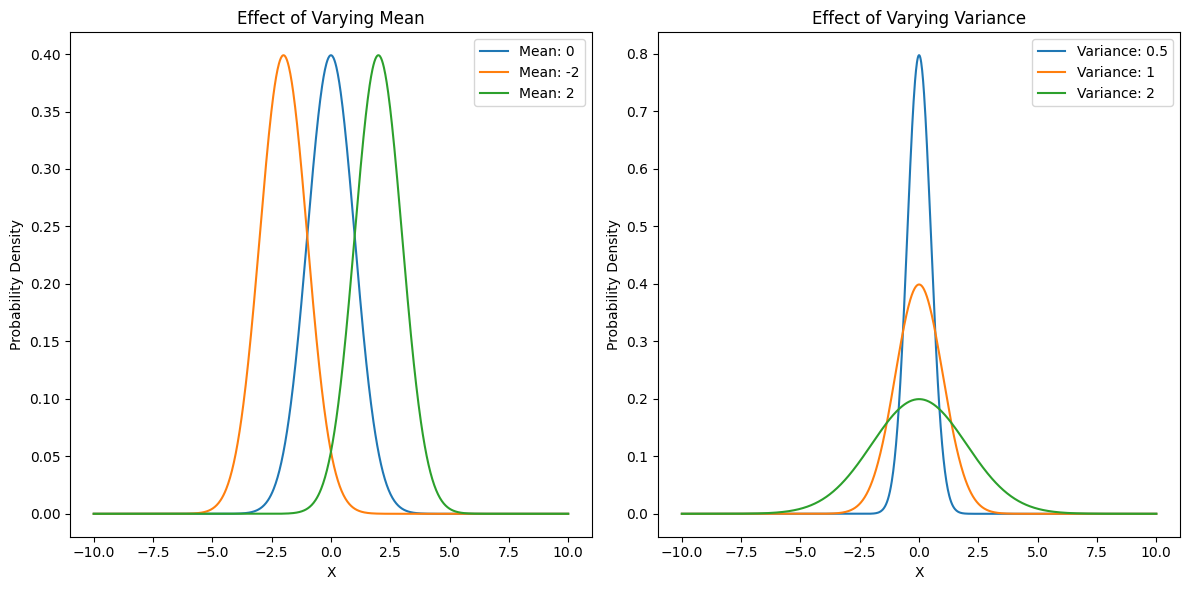

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian distribution function
def gaussian_distribution(X, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-((X - mu)**2) / (2 * sigma**2))

# Generate a vector X over a range of values
X = np.linspace(-10, 10, 1000)

# Example means and variances to plot
means = [0, -2, 2]
variances = [0.5, 1, 2]

# Plot the effect of varying the mean while keeping variance constant
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for mu in means:
    Y = gaussian_distribution(X, mu, 1)  # Keeping variance constant at 1
    plt.plot(X, Y, label=f'Mean: {mu}')
plt.title('Effect of Varying Mean')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

# Plot the effect of varying the variance while keeping mean constant
plt.subplot(1, 2, 2)
for sigma in variances:
    Y = gaussian_distribution(X, 0, sigma)  # Keeping mean constant at 0
    plt.plot(X, Y, label=f'Variance: {sigma}')
plt.title('Effect of Varying Variance')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()


Question-2

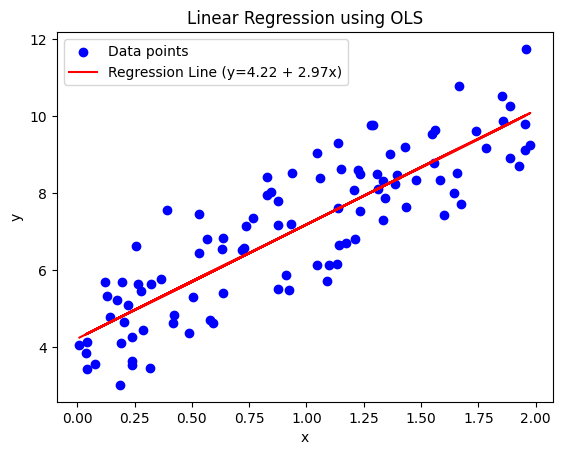

Intercept (beta_0): 4.22
Slope (beta_1): 2.97


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data (x, y)
np.random.seed(0)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

# Linear Regression function
def linear_regression(x, y):
    # Calculate the mean of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculate the slope (beta_1) and intercept (beta_0)
    num = np.sum((x - x_mean) * (y - y_mean))  # Numerator
    denom = np.sum((x - x_mean) ** 2)          # Denominator
    beta_1 = num / denom
    beta_0 = y_mean - beta_1 * x_mean
    
    return beta_0, beta_1

# Predict function
def predict(x, beta_0, beta_1):
    return beta_0 + beta_1 * x

# Fit the linear regression model
beta_0, beta_1 = linear_regression(x, y)

# Predict the y values using the model
y_pred = predict(x, beta_0, beta_1)

# Plot the data and the linear regression line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label=f'Regression Line (y={beta_0:.2f} + {beta_1:.2f}x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression using OLS')
plt.legend()
plt.show()

# Output the slope and intercept
print(f"Intercept (beta_0): {beta_0:.2f}")
print(f"Slope (beta_1): {beta_1:.2f}")

Question-3

Iteration 0: Cost = 25.0042
Iteration 100: Cost = 0.8861
Iteration 200: Cost = 0.4848
Iteration 300: Cost = 0.4572
Iteration 400: Cost = 0.4416
Iteration 500: Cost = 0.4306
Iteration 600: Cost = 0.4227
Iteration 700: Cost = 0.4171
Iteration 800: Cost = 0.4131
Iteration 900: Cost = 0.4103


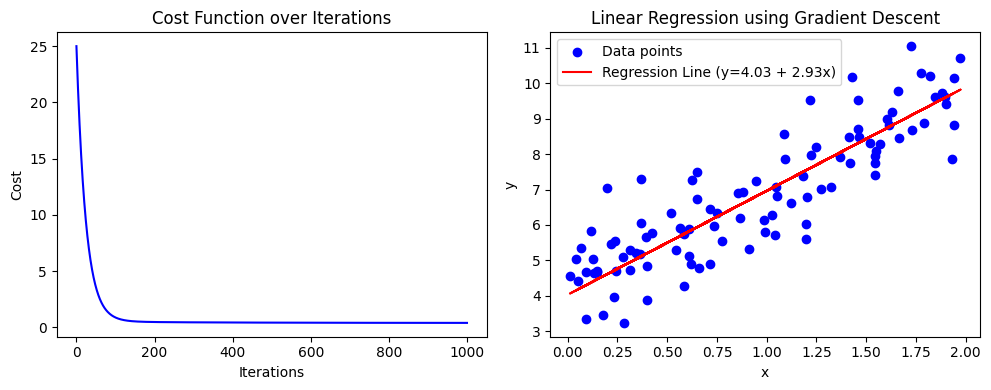

Intercept (theta_0): 4.03
Slope (theta_1): 2.93


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data (x, y)
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

# Gradient descent function
def gradient_descent(x, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta_0 = 0  # Initial intercept
    theta_1 = 0  # Initial slope
    cost_history = []  # Keep track of the cost function for each iteration
    
    for iteration in range(n_iterations):
        # Calculate the hypothesis (predictions)
        y_pred = theta_0 + theta_1 * x
        
        # Calculate gradients
        d_theta_0 = (1 / m) * np.sum(y_pred - y)
        d_theta_1 = (1 / m) * np.sum((y_pred - y) * x)
        
        # Update parameters
        theta_0 = theta_0 - learning_rate * d_theta_0
        theta_1 = theta_1 - learning_rate * d_theta_1
        
        # Calculate and store the cost (mean squared error)
        cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        cost_history.append(cost)
        
        # Print cost every 100 iterations
        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Cost = {cost:.4f}")
    
    return theta_0, theta_1, cost_history

# Perform gradient descent
learning_rate = 0.01
n_iterations = 1000
theta_0, theta_1, cost_history = gradient_descent(x, y, learning_rate, n_iterations)

# Make predictions using the learned parameters
y_pred = theta_0 + theta_1 * x

# Plot the cost function history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(n_iterations), cost_history, 'b-')
plt.title('Cost Function over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Plot the data and the regression line
plt.subplot(1, 2, 2)
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label=f'Regression Line (y={theta_0:.2f} + {theta_1:.2f}x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression using Gradient Descent')
plt.legend()

plt.tight_layout()
plt.show()

# Output the learned parameters
print(f"Intercept (theta_0): {theta_0:.2f}")
print(f"Slope (theta_1): {theta_1:.2f}")

Question-4

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display

# Load the Flowers dataset (same as before)
batch_size = 32
img_height = 180
img_width = 180
data_dir = r"C:\Users\anupa\OneDrive\Desktop\Assignment_Sem-3\Python\flowers"  # Replace with your dataset path

# Load training dataset (to get class names)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Get class names before applying any map transformations
class_names = train_ds.class_names

# Normalize images (after getting class names)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

# Build and train the MLP model (assuming the training has already been done)
model = models.Sequential([
    layers.Flatten(input_shape=(img_height, img_width, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 flower classes
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Dummy: Assume model is already trained (you can load a trained model if you have one)

# Function to preprocess the image
def preprocess_image(image):
    image = image.resize((img_height, img_width))  # Resize the image
    image_array = np.array(image) / 255.0  # Normalize the image
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    return image_array

# Function to predict the flower class
def predict_flower(image):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction)
    return class_names[predicted_class]

# Function to handle image upload and prediction
def on_upload_change(change):
    uploaded_file = change['new']
    if uploaded_file:
        # Load the image
        img = Image.open(io.BytesIO(uploaded_file[0]['content']))
        
        # Display the image
        display(img)
        
        # Make prediction
        flower_class = predict_flower(img)
        
        # Display the predicted class
        print(f"Predicted flower class: {flower_class}")

# Create the file uploader widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)
uploader.observe(on_upload_change, names='value')

# Display the uploader widget
display(uploader)


Question-5

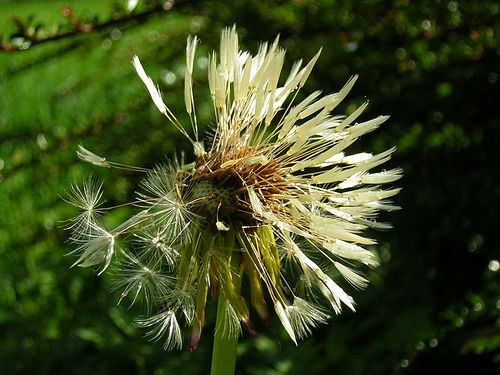

1/1 [==============================] - 0s 207ms/step
Predicted flower class: dandelion


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output
import os

# Load and preprocess the dataset
def load_and_preprocess_data(data_dir, img_height, img_width):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    
    for class_index, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = image.load_img(img_path, target_size=(img_height, img_width))
            img_array = image.img_to_array(img)
            img_array = preprocess_input(img_array)
            images.append(img_array)
            labels.append(class_index)
    
    return np.array(images), np.array(labels), class_names

# Extract features using VGG16
def extract_features(model, images):
    features = model.predict(images)
    return features

# Load paths and parameters
data_dir = r"C:\Users\anupa\OneDrive\Desktop\Assignment_Sem-3\Python\flowers"  # Replace with your dataset path
img_height = 180
img_width = 180

# Load data
images, labels, class_names = load_and_preprocess_data(data_dir, img_height, img_width)

# Load pre-trained VGG16 model for feature extraction (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

# Extract features
features = extract_features(base_model, images)
features_flat = features.reshape(features.shape[0], -1)  # Flatten the features

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features_flat, labels, test_size=0.2, random_state=42)

# Train SVM classifier
svm = SVC(kernel='linear')  # Using a linear kernel for SVM
svm.fit(X_train, y_train)

# Function to preprocess the image
def preprocess_image(img):
    img = img.resize((img_height, img_width))  # Resize the image
    img_array = np.array(img)
    img_array = preprocess_input(img_array)  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to predict the flower class
def predict_flower(img):
    processed_image = preprocess_image(img)
    features = extract_features(base_model, processed_image)
    features_flat = features.reshape(features.shape[0], -1)  # Flatten the features
    prediction = svm.predict(features_flat)
    return class_names[prediction[0]]

# Function to handle image upload and prediction
def on_upload_change(change):
    uploaded_file = change['new']
    if uploaded_file:
        # Load the image
        img = Image.open(io.BytesIO(uploaded_file[0]['content']))
        
        # Display the image
        clear_output(wait=True)
        display(img)
        
        # Make prediction
        flower_class = predict_flower(img)
        
        # Display the predicted class
        print(f"Predicted flower class: {flower_class}")

# Create the file uploader widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)
uploader.observe(on_upload_change, names='value')

# Display the uploader widget
display(uploader)


Question 6

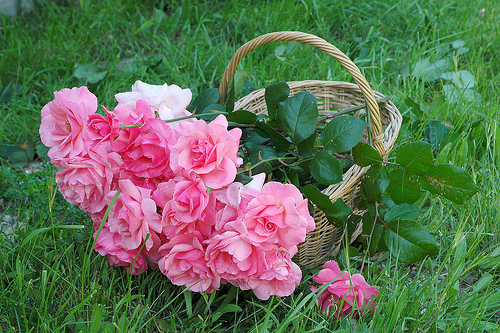

1/1 [==============================] - 0s 191ms/step
Predicted flower class: rose


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import io
import ipywidgets as widgets
from IPython.display import display, clear_output
import os

# Define and train the CNN model
def create_model(num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Load and preprocess the dataset
def load_and_preprocess_data(data_dir, img_height, img_width):
    # Load datasets
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=32
    )
    
    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=32
    )
    
    # Normalize images
    normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
    train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
    val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

    # Extract class names
    try:
        class_names = train_ds.class_names
    except AttributeError:
        class_names = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    
    return train_ds, val_ds, class_names

# Paths and parameters
data_dir = r"C:\Users\anupa\OneDrive\Desktop\Assignment_Sem-3\Python\flowers"  # Replace with your dataset path
img_height = 180
img_width = 180

# Load data
train_ds, val_ds, class_names = load_and_preprocess_data(data_dir, img_height, img_width)
print(f"Class names: {class_names}")

# Define and train the CNN model
num_classes = len(class_names)
model = create_model(num_classes)
model.summary()

# Train the model (for demo purposes, you might need to replace this with your own trained model)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3  # Reduce the number of epochs for demonstration
)

# Save the model
model.save('flower_classifier.h5')

# Load the model
model = tf.keras.models.load_model('flower_classifier.h5')

# Function to preprocess the uploaded image
def preprocess_image(img):
    img = img.resize((img_height, img_width))  # Resize the image
    img_array = np.array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to predict the flower class
def predict_flower(img):
    processed_image = preprocess_image(img)
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction)
    return class_names[predicted_class]

# Function to handle image upload and prediction
def on_upload_change(change):
    uploaded_file = change['new']
    if uploaded_file:
        # Load the image
        img = Image.open(io.BytesIO(uploaded_file[0]['content']))
        
        # Display the image
        clear_output(wait=True)
        display(img)
        
        # Make prediction
        flower_class = predict_flower(img)
        
        # Display the predicted class
        print(f"Predicted flower class: {flower_class}")

# Create the file uploader widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)
uploader.observe(on_upload_change, names='value')

# Display the uploader widget
display(uploader)


Question 7

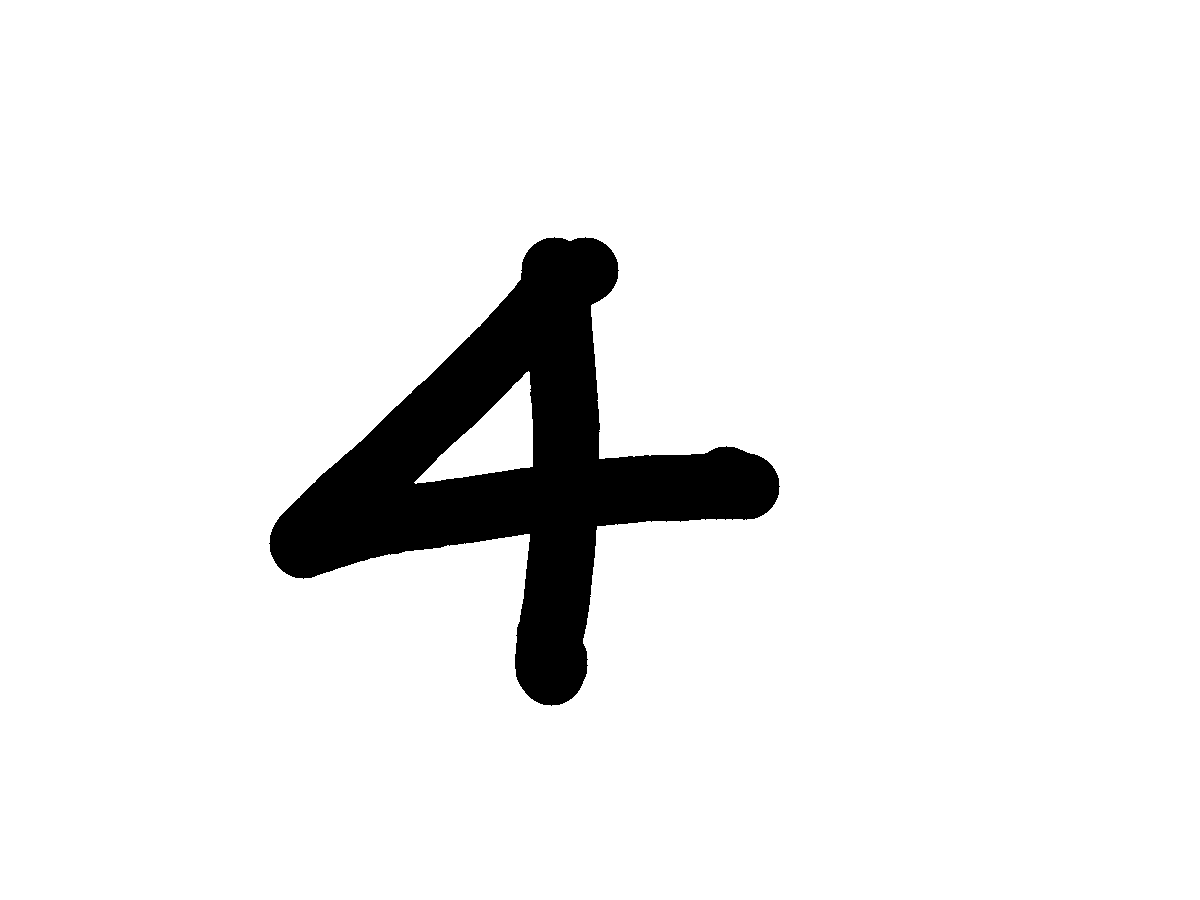

Predicted character: 4


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image
from IPython.display import display, clear_output
import io

# Load the MNIST dataset
digits = datasets.load_digits()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

# Function to preprocess uploaded image
def preprocess_image(img):
    # Convert the image to grayscale and resize it to 8x8 pixels
    img = img.convert('L').resize((8, 8))
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    
    # Normalize the pixel values (to range 0-16 as in the MNIST dataset)
    img_array = (img_array / 255.0) * 16
    
    # Invert the image (as MNIST digits are white on black)
    img_array = 16 - img_array
    
    # Flatten the image array to match input shape
    img_array = img_array.flatten().reshape(1, -1)
    
    # Standardize using the scaler from training
    img_array = scaler.transform(img_array)
    
    return img_array

# Function to predict the character using SVM
def predict_character(img):
    img_array = preprocess_image(img)
    prediction = clf.predict(img_array)
    return prediction[0]

# Function to handle image upload and prediction
def on_upload_change(change):
    uploaded_file = change['new']
    if uploaded_file:
        # Load the image
        img = Image.open(io.BytesIO(uploaded_file[0]['content']))
        
        # Display the image
        clear_output(wait=True)
        display(img)
        
        # Make prediction
        predicted_character = predict_character(img)
        
        # Display the predicted character
        print(f"Predicted character: {predicted_character}")

# Create the file uploader widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)
uploader.observe(on_upload_change, names='value')

# Display the uploader widget
display(uploader)


Question-8

Epoch 1/10
23/23 [==============================] - 2s 46ms/step - loss: 1.4644 - accuracy: 0.4815 - val_loss: 1.5107 - val_accuracy: 0.3989
Epoch 2/10
23/23 [==============================] - 1s 34ms/step - loss: 1.3931 - accuracy: 0.4815 - val_loss: 1.4926 - val_accuracy: 0.3989
Epoch 3/10
23/23 [==============================] - 1s 34ms/step - loss: 1.3939 - accuracy: 0.4815 - val_loss: 1.4819 - val_accuracy: 0.3989
Epoch 4/10
23/23 [==============================] - 1s 33ms/step - loss: 1.4009 - accuracy: 0.4815 - val_loss: 1.4861 - val_accuracy: 0.3989
Epoch 5/10
23/23 [==============================] - 1s 34ms/step - loss: 1.4031 - accuracy: 0.4815 - val_loss: 1.4959 - val_accuracy: 0.3989
Epoch 6/10
23/23 [==============================] - 1s 33ms/step - loss: 1.3925 - accuracy: 0.4815 - val_loss: 1.4957 - val_accuracy: 0.3989
Epoch 7/10
23/23 [==============================] - 1s 33ms/step - loss: 1.3947 - accuracy: 0.4815 - val_loss: 1.5276 - val_accuracy: 0.3989
Epoch 8/10
23

C:\Users\anupa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anupa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anupa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

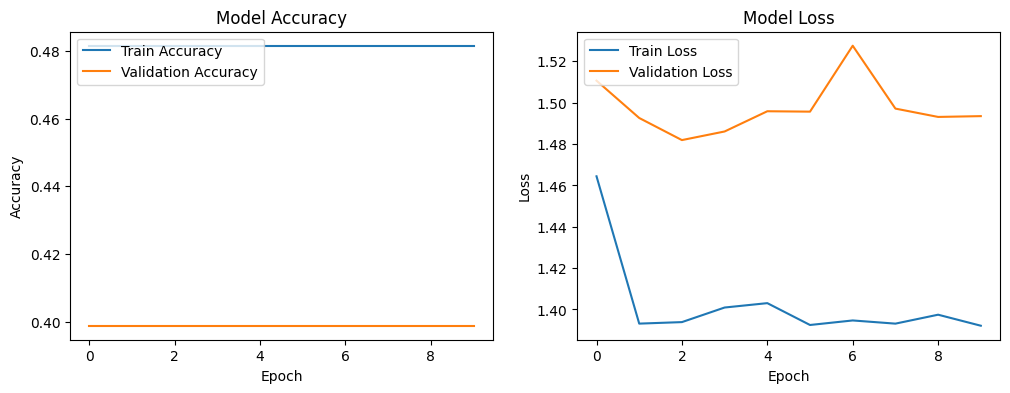

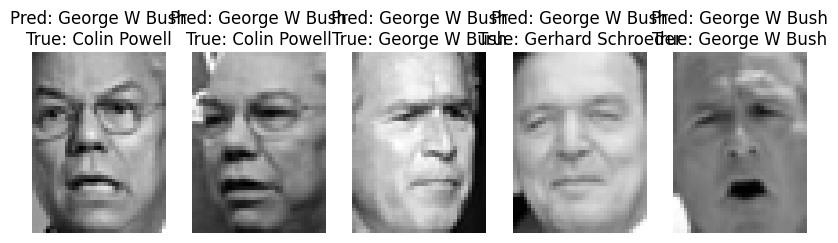

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_lfw_people

# Load the LFW (Labeled Faces in the Wild) dataset
lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
X = lfw_people.images  # Face images (grayscale)
y = lfw_people.target  # Labels (people)
target_names = lfw_people.target_names  # Names of people

# Normalize the pixel values to be between 0 and 1
X = X / 255.0

# Add a channel dimension (since the images are grayscale)
X = X[..., np.newaxis]

# One-hot encode the labels
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(target_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Display classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Show plots
plt.show()

# Show some sample test images with their predicted and true labels
n_samples = 5
plt.figure(figsize=(10, 5))
for i in range(n_samples):
    plt.subplot(1, n_samples, i + 1)
    plt.imshow(X_test[i].reshape(X_test.shape[1], X_test.shape[2]), cmap='gray')
    plt.title(f"Pred: {target_names[y_pred_classes[i]]}\nTrue: {target_names[y_true_classes[i]]}")
    plt.axis('off')

plt.show()


Question-10

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, DenseNet201
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load pre-trained VGG-16 and DenseNet-201 models with weights trained on ImageNet
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
def build_custom_model(base_model, num_classes):
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the number of classes (e.g., benign and malignant)
num_classes = 2
class_names = ['Benign', 'Malignant']

# Build models based on the pre-trained VGG-16 and DenseNet-201 architectures
vgg16_custom_model = build_custom_model(vgg16_model, num_classes)
densenet_custom_model = build_custom_model(densenet_model, num_classes)

# Function to preprocess the uploaded image
def preprocess_image(img, model_type):
    img = img.resize((224, 224))  # Resize image to 224x224 pixels
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Preprocess the image based on the model type
    if model_type == 'vgg16':
        img_array = vgg16_preprocess(img_array)
    elif model_type == 'densenet':
        img_array = densenet_preprocess(img_array)

    return img_array

# Function to predict using VGG-16
def predict_vgg16(img):
    processed_image = preprocess_image(img, model_type='vgg16')
    prediction = vgg16_custom_model.predict(processed_image)
    predicted_class = np.argmax(prediction)
    return class_names[predicted_class]

# Function to predict using DenseNet-201
def predict_densenet(img):
    processed_image = preprocess_image(img, model_type='densenet')
    prediction = densenet_custom_model.predict(processed_image)
    predicted_class = np.argmax(prediction)
    return class_names[predicted_class]

# Function to handle image upload and prediction
def on_upload_change(change):
    uploaded_file = change['new']
    if uploaded_file:
        # Load the image
        img = Image.open(io.BytesIO(uploaded_file[0]['content']))
        
        # Display the uploaded image
        clear_output(wait=True)
        display(img)
        
        # Predict using VGG-16
        vgg16_prediction = predict_vgg16(img)
        
        # Predict using DenseNet-201
        densenet_prediction = predict_densenet(img)
        
        # Display the predictions
        print(f"VGG-16 Prediction: {vgg16_prediction}")
        print(f"DenseNet-201 Prediction: {densenet_prediction}")

# Create the file uploader widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)
uploader.observe(on_upload_change, names='value')

# Display the uploader widget
display(uploader)


74836368/74836368 [==============================] - 93s 1us/step


FileUpload(value=(), accept='image/*', description='Upload')